the steady-state diffusion equation for $\phi$:

$$ \nabla (\kappa \, \nabla \phi) +S = 0$$


For the 2D case and for uniform diffusivity, it can be descritized and written as follows (using the divergence theorem, and maybe also through Taylors series expansion):

$$4 \phi_{i,j} = \left[  \phi_{i+1, j} + \phi_{i-1, j} + \phi_{i, j+1} + \phi_{i, j-1}\right] + \frac{1}{W \, \kappa} S_{i,j} $$

where $W$ is the thickness of the 2D plate.

In [144]:
from node import Node, Boundary
from squeare_gridder import Grid

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# grid parameters:
lims = [[0.0, 1.0], 
        [0.0, 1.0]]
N = [30,30]
N_tot = N[0] * N[1]

# set up the grid automatically:
grid = Grid(lims, N)
grid.make_nodes()

write in matrix form:

$$ M_{k a} \, \phi_{a} = s_k $$

where the indexes $k,a$ are formed from all of the possible $i,j$ combinations. Also, $s_k$ is the  normalized source vector in addition to any boundary conditions --

$S_{i,j} / (4 W \, \kappa) + \phi_B$,



In [197]:
# makeup the Matrix from the system above


M = np.zeros( (N_tot, N_tot) )
s = np.zeros( (N_tot) )

for i in range(len(grid.nodes)):
    any_bounaries = False
    
    for nb in np.ravel(grid.nodes[i].neighbuors):
        
        if type(nb) == Node:
            j = grid.coords_seq.index( list(nb.x) )
            M[i,j] = -1.0
        
        elif type(nb) == Boundary:
            s[i] = 1.0 #2.0

    if any_bounaries:
        M[i,i] = 5.0
    else:
        M[i,i] = 4.0
        
x, y = np.array(grid.coords[0]), np.array(grid.coords[1])
            
s[grid.get_coord_number( [x[8],y[8]] )] += 6.0
s[grid.get_coord_number( [x[8],y[7]] )] += 3.0
s[grid.get_coord_number( [x[15],y[12]] )] += 10.0

In [198]:
# solve the problem by inversion:
phi = np.dot( np.linalg.inv(M), s)


# associate the solution to the nodes over the grid:
for i,node in enumerate(grid.nodes):
    node.set_param('result', phi[i])

<a list of 3 text.Text objects>

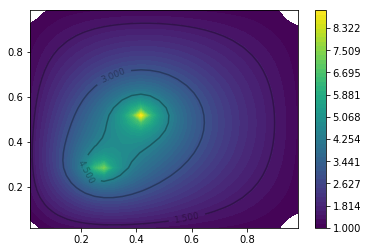

In [200]:
sol = np.zeros(N)

e = 0
for i in range(sol.shape[0]):
    for j in range(sol.shape[1]):
        sol[i,j] = grid.nodes[e].result
        e+=1
        

fig, ax = plt.subplots()
c = ax.contourf(x, y, sol, levels=np.linspace(1, np.amax(sol), num=50))
fig.colorbar(c)


CS = ax.contour(x, y, sol, levels=[1.5,3,4.5], colors='k', alpha=.3)
ax.clabel(CS, fontsize=9, inline=1)

# in 1D:

In [201]:
# grid parameters:
lims = [[0.0, 1.0]]
N = [10]
N_tot = N[0]

# set up the grid automatically:
grid = Grid(lims, N)
grid.make_nodes()


# set unequal boundary conditions:
grid.boundaries[0].set_param('value', 1.0)
grid.boundaries[1].set_param('value', 3.0)

In [205]:
M = np.zeros( (N_tot, N_tot) )
s = np.zeros( (N_tot) )

for i in range(len(grid.nodes)):
    any_boundary = False
    
    for nb in np.ravel(grid.nodes[i].neighbuors):
        
        if type(nb) == Node:
            j = grid.coords_seq.index( list(nb.x) )
            M[i,j] = -1.0 
        
        # boundary conditions - constant phi = 1
        elif type(nb) == Boundary:
            s[i] = 2*nb.value 
            any_boundary = True
    
    if any_boundary:
        M[i,i] = 3.0
    else:
        M[i,i] = 2.0

x = np.array(grid.coords[0])

# add a uniform source of heating:
s += 10.0 * grid.dx[0]**2

In [206]:
# solve the problem by inversion:
phi = np.dot( np.linalg.inv(M), s)


# associate the solution to the nodes over the grid:
for i,node in enumerate(grid.nodes):
    node.set_param('result', phi[i])

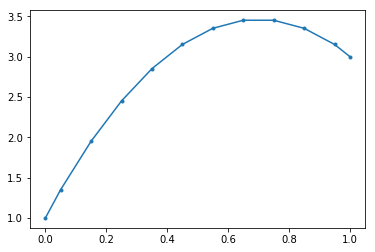

In [207]:
sol = np.zeros(N)

e = 0
for i in range(sol.shape[0]):
    sol[i] = grid.nodes[e].result
    e+=1
        

fig, ax = plt.subplots()
X = np.append(np.append(0,x), 1)
Sol = np.append(np.append(1, sol), 3)
ax.plot(X, Sol, 'o-', ms = 3)